In [1]:
import pylab
import networkx as nx
import matplotlib.pyplot as plt
from rdflib.namespace import DC, FOAF
from rdflib import Graph, Literal, BNode, Namespace, RDF, URIRef, Namespace

# matplotlib settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 7]

In [2]:
rdf_file = "/home/chris/Workspace/app/anacDATA/triple/output.ttl"

rdf_graph = Graph()
rdf_graph.parse(rdf_file, format="turtle")

<Graph identifier=N855468b4a57143e2b313060fdb8d9d6c (<class 'rdflib.graph.Graph'>)>

In [3]:
def get_color(resource):
    color = "#607D8B"
    if '/gara/' in str(resource):
        color = '#B71C1C' # red
    elif '/fornitore/' in str(resource):
        color = '#64DD17' # green
    elif '/pa/' in str(resource):
        color = '#1565C0' # blue
    return color

In [4]:
g = nx.MultiGraph()
for s, p, o in rdf_graph:
    g.add_node(str(s))
    g.add_node(str(o))
    g.add_edge(str(s), str(o), label=str(p), color="blue")  

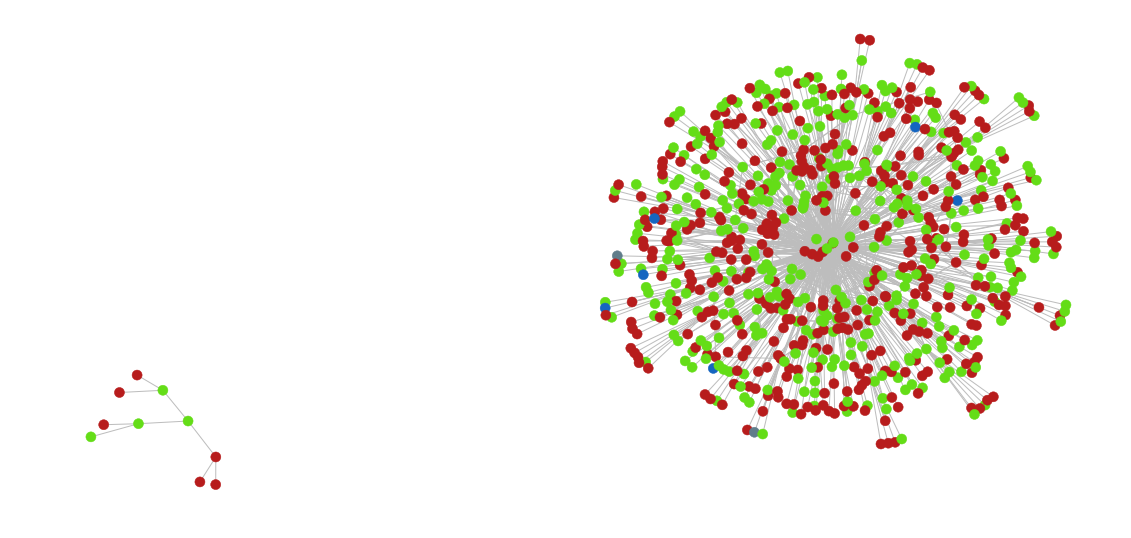

In [6]:
# pos=nx.spring_layout(g)
options = {
    'node_color': [get_color(s) for s, p, o in rdf_graph],
    'node_size': 100,
    'width': 1,
    'style': 'solid',
    'edge_color': '#BDBDBD'
}
nx.draw(g, with_labels=False, **options)
plt.show()